# Lab 2: Linear Regression 
# Objective: To understand and apply the complete Machine Learning (ML) pipeline using Linear Regression for a regression (price prediction) problem.
# Submitted By : Rohan Shrestha(ACE079BCT048)

## Foundational Concepts: Understanding AI, ML, DL, and Data Science Ecosystem

The modern technological landscape encompasses several interconnected disciplines focused on intelligent systems and data-driven decision making:

- **Artificial Intelligence (AI):** Represents the comprehensive domain of computer science dedicated to creating intelligent systems capable of simulating human-like cognitive functions including logical reasoning, pattern recognition, autonomous learning, problem-solving, and strategic decision-making. AI encompasses both rule-based systems and learning-based approaches to replicate intelligent behavior in machines.

- **Machine Learning (ML):** Constitutes a specialized subdomain within artificial intelligence that empowers computational systems to automatically discover patterns, relationships, and insights from historical data without explicit programming. ML algorithms iteratively improve their performance by learning from experience, enabling systems to make accurate predictions or decisions on previously unseen data.

- **Deep Learning (DL):** Represents an advanced subset of machine learning characterized by the utilization of artificial neural networks with multiple hidden layers (deep architectures). These sophisticated models excel at automatically extracting hierarchical feature representations from raw, high-dimensional data such as images, audio signals, natural language text, and time-series data, making them particularly effective for complex pattern recognition tasks.

- **Data Science:** Encompasses the interdisciplinary field that combines statistical analysis, computational programming, domain expertise, and visualization techniques to extract actionable intelligence from structured and unstructured data. Data scientists engage in the complete analytical lifecycle: data acquisition and collection, data cleansing and preprocessing, exploratory analysis, predictive modeling, interpretation of results, and communication of insights for informed business decisions.

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline


# Task 1: Simple Linear Regression (Single Feature)

**Primary Objective:** Construct and evaluate a simple linear regression predictive model utilizing exclusively the **housing_median_age** feature as the independent variable to forecast the **median_house_value** target variable.

This experiment demonstrates the fundamental principles of linear regression by examining the relationship between a single predictor and the outcome, providing insights into baseline model performance before advancing to more complex multivariate approaches.

We will systematically implement the comprehensive **7-stage Machine Learning development pipeline** as stipulated in the assignment requirements, ensuring a thorough and methodical approach to model development.

## Data Acquisition and Initial Exploration

The inaugural phase of any machine learning project involves obtaining and conducting preliminary examination of the dataset. We load the housing dataset from the CSV file and perform initial diagnostic checks to understand its structure and characteristics:

- **Dataset Dimensions:** Verify the number of observations (rows) and features (columns)
- **Feature Inventory:** Examine all available column names and their types
- **Structural Overview:** Assess data types, memory usage, and overall dataset composition

This exploratory phase establishes foundational understanding crucial for subsequent preprocessing and modeling decisions.

In [51]:
housing_dataframe = pd.read_csv("housing.csv")
housing_dataframe.shape, housing_dataframe.columns

((20640, 10),
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value', 'ocean_proximity'],
       dtype='object'))

In [52]:
housing_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Data Quality Assessment and Cleansing

Data quality is paramount for reliable model performance. In this phase, we systematically identify and address data quality issues, particularly missing values that could compromise our analysis.

Upon inspection, we discover that the **total_bedrooms** attribute contains missing values. We employ **median imputation** as our strategy for handling these gaps.

**Rationale for Median Imputation:**
- The median is a robust central tendency measure that remains unaffected by extreme outliers or skewed distributions
- Unlike the mean, which can be heavily influenced by unusually high or low values, the median provides a more representative "typical" value
- This approach preserves the overall distribution characteristics while maintaining data integrity
- Particularly suitable for housing data where outliers (luxury or distressed properties) might skew the mean

In [53]:
missing_values_summary = housing_dataframe.isna().sum().sort_values(ascending=False)
missing_values_summary

total_bedrooms        207
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [54]:
bedrooms_median_value = housing_dataframe["total_bedrooms"].median()
housing_dataframe["total_bedrooms"] = housing_dataframe["total_bedrooms"].fillna(bedrooms_median_value)

post_imputation_missing_check = housing_dataframe.isna().sum().sort_values(ascending=False).head()
post_imputation_missing_check

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
dtype: int64

## Feature Engineering and Selection

Feature engineering involves the careful selection and preparation of input variables that will be used to train our predictive model. For this univariate linear regression experiment, we strategically select:

- **Independent Variable (X)**: `housing_median_age` - represents the median age of houses in a given district
- **Dependent Variable (y)**: `median_house_value` - represents the target variable we aim to predict (median house prices)

**Justification for Feature Selection:**
- Housing age represents a temporal characteristic that may exhibit correlation with property valuation
- Older neighborhoods might have established character and infrastructure, potentially affecting desirability and pricing
- Single-feature models offer superior interpretability, allowing clear understanding of the relationship through two parameters: slope (rate of change) and intercept (baseline value)
- This establishes a baseline performance benchmark before introducing additional complexity
- The linear relationship can be easily visualized and communicated to stakeholders

This simplified approach allows us to isolate the effect of a single predictor, providing valuable insights into whether housing age alone can serve as a meaningful indicator of property value.

In [55]:
# Must be 2D for sklearn
feature_matrix_age = housing_dataframe[["housing_median_age"]]
target_vector_price = housing_dataframe["median_house_value"]

feature_matrix_age.head(), target_vector_price.head()

(   housing_median_age
 0                41.0
 1                21.0
 2                52.0
 3                52.0
 4                52.0,
 0    452600.0
 1    358500.0
 2    352100.0
 3    341300.0
 4    342200.0
 Name: median_house_value, dtype: float64)

## Algorithm Selection

Selecting the appropriate machine learning algorithm is critical for addressing the specific characteristics of our prediction task. We have chosen **Linear Regression** for the following compelling reasons:

- **Nature of Target Variable:** The outcome variable (median_house_value) is continuous and unbounded, making regression the appropriate family of algorithms
- **Interpretability:** Linear regression provides transparent, easily interpretable coefficients that directly quantify the relationship between predictor and outcome
- **Baseline Establishment:** Simple linear models serve as essential benchmarks; if a simple model performs adequately, complex models may be unnecessary
- **Computational Efficiency:** Linear regression requires minimal computational resources and training time
- **Analytical Solution:** Unlike iterative optimization methods, linear regression has a closed-form solution for optimal parameters

## Loss Function Selection

The loss function (also called cost function or objective function) quantifies the discrepancy between predicted and actual values, guiding the model's learning process. We employ **Mean Squared Error (MSE)** as our optimization criterion:

**Mathematical Formulation:**
$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

**Characteristics and Advantages:**
- Computes the average of squared differences between actual values ($y_i$) and predicted values ($\hat{y}_i$)
- Squaring the errors ensures all deviations contribute positively (no cancellation of positive/negative errors)
- Larger errors are penalized more severely due to quadratic nature (beneficial when large prediction errors are particularly undesirable)
- Differentiable everywhere, enabling efficient optimization through gradient-based methods
- Lower MSE values indicate superior predictive accuracy and model fit
- Standard metric in regression tasks, facilitating cross-study comparisons

## Model Training and Parameter Learning

The training phase involves fitting the linear regression model to historical data, enabling it to learn the optimal parameters (coefficients) that minimize the loss function.

**Data Partitioning Strategy:**
- **Training Set:** 80% of the dataset - used to learn model parameters
- **Testing Set:** 20% of the dataset - held out for unbiased performance evaluation

**Rationale for 80-20 Split:**
- Provides substantial data for learning patterns while reserving adequate samples for testing
- Industry-standard practice balancing training data availability and evaluation reliability
- Random state fixed (42) ensures reproducibility across runs

The training process determines the optimal slope and intercept values that best describe the linear relationship between housing age and property value in our training data.

In [56]:
train_features_age, test_features_age, train_target_price, test_target_price = train_test_split(
    feature_matrix_age, target_vector_price, test_size=0.2, random_state=42
)

univariate_regression_model = LinearRegression()
univariate_regression_model.fit(train_features_age, train_target_price)

univariate_regression_model

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## Model Evaluation

The evaluation phase rigorously assesses how well our trained model generalizes to unseen data. We compute multiple performance metrics on the reserved test set:

**Primary Evaluation Metrics:**

1. **Mean Squared Error (MSE):** Measures average squared prediction error
   - Unit: squared dollars (e.g., if predictions off by $10,000, MSE includes 100,000,000 component)
   - Lower values indicate better accuracy

2. **R² Score (Coefficient of Determination):** Represents the proportion of variance in the target variable explained by the model
   - Range: 0 to 1 (can be negative for poorly fitted models)
   - R² = 1: Perfect predictions (all variance explained)
   - R² = 0: Model performs no better than simply predicting the mean
   - R² < 0: Model performs worse than the baseline mean predictor

These complementary metrics provide comprehensive understanding of model performance from different perspectives: absolute error magnitude (MSE) and explanatory power (R²).

In [57]:
predicted_prices_test = univariate_regression_model.predict(test_features_age)

mse_univariate_model = mean_squared_error(test_target_price, predicted_prices_test)
r2_score_univariate_model = r2_score(test_target_price, predicted_prices_test)

mse_univariate_model, r2_score_univariate_model

(12939617265.100323, 0.012551235533311389)

### Mathematical Model Interpretation

Understanding the learned parameters is crucial for interpreting how our model makes predictions. For univariate linear regression, the relationship follows the classic linear equation:

**Prediction Function:**
$$
\hat{y} = \beta_1 x + \beta_0
$$

Where:
- $\hat{y}$ = Predicted median house value (in dollars)
- $x$ = Housing median age (in years)
- $\beta_1$ = Coefficient (slope parameter) - quantifies the rate of change
- $\beta_0$ = Intercept (bias term) - represents the baseline prediction

**Parameter Interpretations:**

- **Coefficient (Slope, $\beta_1$):** Represents the expected change in the predicted house price for each additional year of housing age. A positive coefficient suggests older houses command higher prices (perhaps due to location desirability), while negative suggests depreciation with age.

- **Intercept ($\beta_0$):** Represents the predicted house price when housing age equals zero (newly constructed). While this extrapolation may not be realistic for our dataset domain, it serves as the mathematical anchor point for the linear relationship.

These parameters are learned through Ordinary Least Squares (OLS) optimization, which minimizes the sum of squared residuals between actual and predicted values.

In [58]:
coefficient_housing_age = univariate_regression_model.coef_[0]
intercept_baseline_price = univariate_regression_model.intercept_

coefficient_housing_age, intercept_baseline_price

(np.float64(951.4618671495982), np.float64(179975.00158647486))

**Interpretation (Task 1):**
- **Slope (coefficient)** ≈ **951.46**  
  → For each **+1 year** increase in `housing_median_age`, the model predicts price increases by about **951.46 USD** (on average, holding nothing else).
- **Intercept** ≈ **179975.00**  
  → Predicted price when median age is 0 years (not very realistic, but part of the line equation).

**Model Limitations and Insights:**
- **Low R² Score:** The R² value is notably low (close to 0), indicating that housing age alone explains very little of the variance in house prices across different districts. This suggests that property valuation depends on numerous other factors such as location, income levels, proximity to amenities, and property characteristics.

- **Univariate Constraint:** By using only a single feature, we're capturing a simplified relationship that ignores the multifaceted nature of real estate pricing dynamics.

- **Baseline Benchmark:** Despite limited predictive power, this model establishes an important baseline for comparison with more sophisticated multivariate models in subsequent analyses.

### Supplementary Analysis: Visualization of Model Performance

Visual representations provide intuitive understanding of model behavior and prediction quality. We create two complementary visualizations:

**Visualization 1: Scatter Plot with Fitted Regression Line**
- Displays the actual relationship between housing age (x-axis) and house values (y-axis)
- Overlays the learned linear regression line to show how well it captures the trend
- Helps identify patterns, outliers, and potential non-linearities the model might miss

**Visualization 2: Predicted vs Actual Values Plot**
- Plots predicted prices against true prices for all test observations
- Ideal predictions would fall perfectly on the diagonal line (y = x)
- Scatter around the diagonal reveals prediction errors and systematic biases
- Useful for diagnosing heteroscedasticity (non-constant variance) or consistent over/under-prediction patterns

d:\CodingAndWork\AI_LAB\lab1_env\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


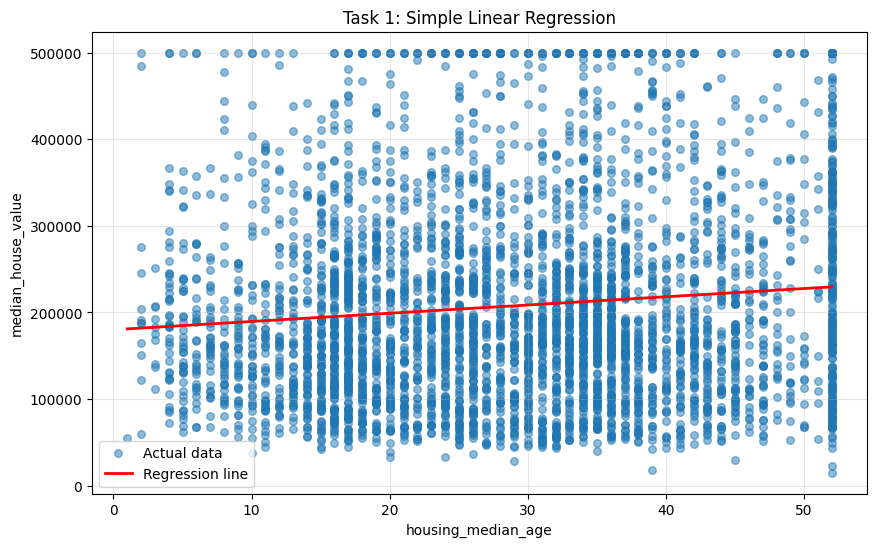

In [59]:
# 1) Scatter + regression line
plt.figure(figsize=(10, 6))
plt.scatter(test_features_age, test_target_price, alpha=0.5, s=30, label='Actual data')
# line using sorted x
age_values_sorted = np.sort(test_features_age["housing_median_age"].values).reshape(-1, 1)
predicted_line_values = univariate_regression_model.predict(age_values_sorted)
plt.plot(age_values_sorted, predicted_line_values, color='red', linewidth=2, label='Regression line')
plt.xlabel("housing_median_age")
plt.ylabel("median_house_value")
plt.title("Task 1: Simple Linear Regression")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

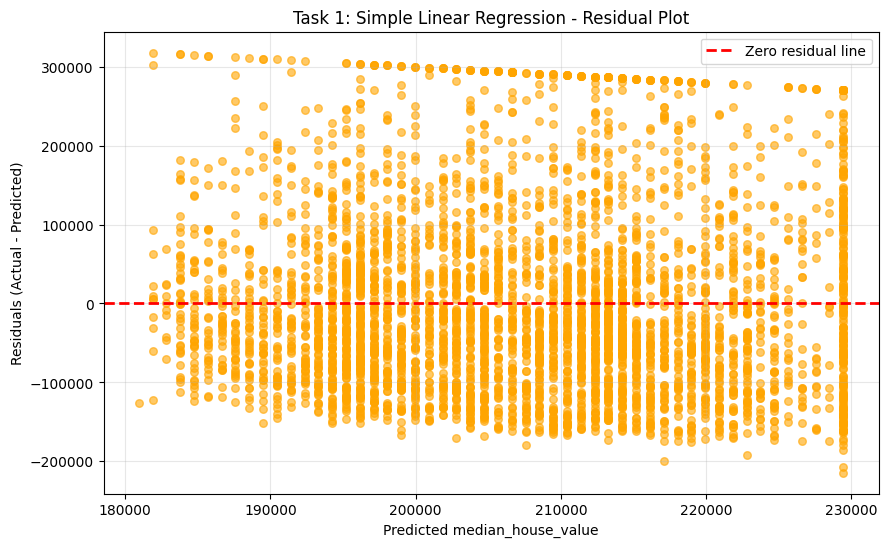

In [60]:
# 2) Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(test_target_price, predicted_prices_test, alpha=0.6, s=30, color='blue', label='Predictions')
# Add perfect prediction reference line
min_val = min(test_target_price.min(), predicted_prices_test.min())
max_val = max(test_target_price.max(), predicted_prices_test.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect prediction')
plt.xlabel("Actual median_house_value")
plt.ylabel("Predicted median_house_value")
plt.title("Task 1: Predicted vs Actual")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Understanding the Visualization Results

**Why Do the Charts Look "Random"?**

The scatter plots appear highly dispersed because **housing age alone is a very poor predictor of house prices**. This is exactly what we expect given the low R² score (close to 0).

**Chart 1 - Scatter Plot with Regression Line:**
- The **blue dots** represent actual house prices at different housing ages
- The **red line** shows the learned linear relationship (very slight positive slope)
- The massive scatter around the line indicates that age explains almost **none** of the price variation
- Most of the variability comes from other factors (location, income, property features)

**Chart 2 - Predicted vs Actual:**
- The **red dashed diagonal line** represents perfect predictions (where predicted = actual)
- The **blue points** show our model's predictions
- Notice how predicted values cluster in a narrow band (~180k-230k) while actual values span widely (0-500k)
- This **horizontal clustering** demonstrates that the model essentially predicts similar values regardless of the actual price
- If the model were good, blue points would align closely along the red diagonal line

**Key Insight:** This poor performance is **intentional and expected** - it establishes why we need multivariate models (Task 2) that incorporate multiple predictive features like location, income, and property characteristics.

### Fundamental Assumptions Underlying Linear Regression

Linear regression models rely on several critical statistical assumptions. When these assumptions are violated, model performance, interpretation, and statistical inference may be compromised:

**1. Linearity Assumption:**
- The relationship between predictors and the response variable should be fundamentally linear
- Non-linear relationships require transformation or different modeling approaches

**2. Normality of Residuals:**
- Prediction errors (residuals) should follow an approximate normal distribution
- Important for confidence intervals and hypothesis testing
- Can be assessed using Q-Q plots or statistical tests (Shapiro-Wilk, Kolmogorov-Smirnov)

**3. Homoscedasticity (Constant Variance):**
- The variance of residuals should remain consistent across all levels of predicted values
- Heteroscedasticity can be detected via residual plots and addressed through transformations or weighted regression

**4. Independence of Observations:**
- Each data point should be independent; no autocorrelation or clustering effects
- Violated in time-series or spatially correlated data
- Requires specialized techniques (e.g., mixed models, time-series methods) if violated

**5. No Multicollinearity (for multiple regression):**
- Predictor variables should not be highly correlated with each other
- High multicollinearity inflates coefficient standard errors and reduces interpretability

# Task 2: Multivariate Linear Regression (Comprehensive Feature Set)

**Primary Objective:** Develop and assess a multiple linear regression predictive model that leverages **all available features** in the dataset (excluding the target variable `median_house_value`) to generate more accurate housing price predictions.

This experiment demonstrates the power of multivariate modeling by incorporating multiple predictors simultaneously, capturing complex interactions and relationships that univariate models cannot represent. We expect substantial performance improvements compared to the single-feature baseline established in Experiment 1.

We will again systematically execute the comprehensive **7-stage Machine Learning development pipeline**, ensuring methodological rigor and reproducibility throughout the modeling process.

## Data Acquisition and Feature Separation

Having previously loaded and performed initial exploration of the dataset in Experiment 1, we now proceed to separate our data into predictor and response components for the multivariate analysis.

**Feature Matrix Construction:**
- **X (Predictor Variables):** All columns except the target variable, including both numerical and categorical features
- **y (Response Variable):** `median_house_value` - the continuous outcome we aim to predict

This comprehensive feature set includes demographic information, geographic characteristics, and property attributes that collectively influence housing prices in complex, potentially non-additive ways.

In [61]:
multivariate_feature_matrix = housing_dataframe.drop(columns=["median_house_value"])
multivariate_target_vector = housing_dataframe["median_house_value"]

multivariate_feature_matrix.head(), multivariate_target_vector.head()

(   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 0    -122.23     37.88                41.0        880.0           129.0   
 1    -122.22     37.86                21.0       7099.0          1106.0   
 2    -122.24     37.85                52.0       1467.0           190.0   
 3    -122.25     37.85                52.0       1274.0           235.0   
 4    -122.25     37.85                52.0       1627.0           280.0   
 
    population  households  median_income ocean_proximity  
 0       322.0       126.0         8.3252        NEAR BAY  
 1      2401.0      1138.0         8.3014        NEAR BAY  
 2       496.0       177.0         7.2574        NEAR BAY  
 3       558.0       219.0         5.6431        NEAR BAY  
 4       565.0       259.0         3.8462        NEAR BAY  ,
 0    452600.0
 1    358500.0
 2    352100.0
 3    341300.0
 4    342200.0
 Name: median_house_value, dtype: float64)

## Data Cleaning

In Experiment 1, we addressed missing values in the `total_bedrooms` feature through median imputation. For the multivariate model, we must additionally handle mixed data types since our feature set now includes:

**Numerical Features:** Continuous or discrete numerical measurements (e.g., latitude, longitude, median_income, total_rooms)

**Categorical Features:** Discrete categories represented as strings (e.g., `ocean_proximity` indicating geographic coastal relationship)

**Preprocessing Challenges:**
- Linear regression requires all inputs to be numerical
- Categorical variables cannot be directly used in mathematical operations
- We must transform categorical features into numerical representations while preserving their semantic meaning
- This transformation will be handled through one-hot encoding in the feature engineering stage

In [62]:
comprehensive_missing_check = housing_dataframe.isna().sum().sort_values(ascending=False)
comprehensive_missing_check

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [63]:
housing_dataframe["total_bedrooms"] = housing_dataframe["total_bedrooms"].fillna(
    housing_dataframe["total_bedrooms"].median()
)

final_missing_verification = housing_dataframe.isna().sum().sort_values(ascending=False).head()
final_missing_verification

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
dtype: int64

## Comprehensive Feature Engineering and Transformation

Feature engineering for multivariate models involves sophisticated preprocessing to ensure all features are appropriately formatted and scaled for optimal model performance.

**Preprocessing Strategies Employed:**

1. **StandardScaler for Numerical Features:**
   - Transforms features to have mean = 0 and standard deviation = 1 (z-score normalization)
   - Ensures features with different scales contribute equally to the model
   - Particularly important when features span vastly different ranges (e.g., latitude vs. total_rooms)
   - Improves numerical stability and convergence in optimization algorithms

2. **OneHotEncoder for Categorical Features:**
   - Converts categorical variables into binary indicator variables (dummy variables)
   - Creates separate binary columns for each category (e.g., ocean_proximity becomes multiple 0/1 columns)
   - **Drop='first' parameter:** Removes one category to avoid the dummy variable trap (perfect multicollinearity)
   - The dropped category becomes the reference baseline against which other categories are compared

**Avoiding the Dummy Variable Trap:**
If we have k categories and create k dummy variables, they would be perfectly collinear (one can be predicted from others), violating regression assumptions and causing computational issues. By dropping one category, we maintain k-1 independent variables.

In [64]:
comprehensive_features = housing_dataframe.drop(columns=["median_house_value"])
comprehensive_target = housing_dataframe["median_house_value"]

comprehensive_features.head(), comprehensive_target.head()

(   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 0    -122.23     37.88                41.0        880.0           129.0   
 1    -122.22     37.86                21.0       7099.0          1106.0   
 2    -122.24     37.85                52.0       1467.0           190.0   
 3    -122.25     37.85                52.0       1274.0           235.0   
 4    -122.25     37.85                52.0       1627.0           280.0   
 
    population  households  median_income ocean_proximity  
 0       322.0       126.0         8.3252        NEAR BAY  
 1      2401.0      1138.0         8.3014        NEAR BAY  
 2       496.0       177.0         7.2574        NEAR BAY  
 3       558.0       219.0         5.6431        NEAR BAY  
 4       565.0       259.0         3.8462        NEAR BAY  ,
 0    452600.0
 1    358500.0
 2    352100.0
 3    341300.0
 4    342200.0
 Name: median_house_value, dtype: float64)

In [65]:
numerical_feature_columns = comprehensive_features.select_dtypes(include=[np.number]).columns.tolist()
categorical_feature_columns = [col for col in comprehensive_features.columns 
                                if col not in numerical_feature_columns]

print("Identified Numerical Features:", numerical_feature_columns)
print("Identified Categorical Features:", categorical_feature_columns)

Identified Numerical Features: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
Identified Categorical Features: ['ocean_proximity']


In [66]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Separate transformers for numerical (scaling) and categorical (one-hot encoding) features
preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ("numerical_scaling", StandardScaler(), numerical_feature_columns),
        ("categorical_encoding", OneHotEncoder(handle_unknown="ignore", drop="first"), 
         categorical_feature_columns)
    ]
)

preprocessing_pipeline

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('numerical_scaling', ...), ('categorical_encoding', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name

## Algorithm Selection

We continue employing **Multiple Linear Regression** as our modeling algorithm, now leveraging its capacity to handle multiple predictors simultaneously:

**Justification for Multiple Linear Regression:**
- **Continuous Target Variable:** House prices remain continuous, making regression the appropriate approach
- **Interpretable Coefficients:** Each feature receives a coefficient indicating its independent contribution to the prediction
- **Computational Efficiency:** Scales well to moderate numbers of features without excessive computational burden
- **Established Baseline:** Provides a strong, interpretable baseline before exploring more complex non-linear models
- **Feature Importance:** Coefficient magnitudes (after scaling) indicate relative feature importance
- **Multivariate Relationships:** Can capture how multiple factors jointly influence property values

**Mathematical Formulation:**
$$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$$

Where each $\beta_i$ represents the partial effect of feature $x_i$ while holding all other features constant.

In [67]:
from sklearn.linear_model import LinearRegression

multivariate_linear_regressor = LinearRegression()
multivariate_linear_regressor

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## Loss Function

We maintain **Mean Squared Error (MSE)** as our loss function, consistent with Experiment 1, ensuring fair performance comparison between univariate and multivariate models.

**MSE Consistency Benefits:**
- Enables direct comparison of model performance across different feature configurations
- Standard metric widely used in regression benchmarking studies
- Provides interpretable units (squared dollars in our case)
- Facilitates assessment of improvement magnitude achieved through additional features

In [68]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error

<function sklearn.metrics._regression.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>

## Model Training

Modern machine learning workflows benefit from pipeline architectures that seamlessly integrate preprocessing and modeling steps into a unified, reproducible framework.

**Pipeline Architecture Benefits:**
1. **Prevents Data Leakage:** Ensures preprocessing is fit only on training data, then applied to test data
2. **Reproducibility:** Entire workflow encapsulated in a single object for consistent application
3. **Code Simplicity:** Eliminates manual tracking of preprocessing steps
4. **Production Readiness:** Pipelines can be serialized and deployed as unified artifacts

**Our Pipeline Components:**
1. **Preprocessing Stage:** ColumnTransformer applies appropriate transformations to numerical and categorical features
2. **Modeling Stage:** Linear Regression learns optimal coefficients from transformed features

This architecture ensures that scaling parameters (means, standard deviations) and encoding schemes are learned exclusively from training data, preventing test set information leakage.

In [69]:
train_features_multi, test_features_multi, train_target_multi, test_target_multi = train_test_split(
    comprehensive_features, comprehensive_target, test_size=0.2, random_state=42
)

numerical_cols_pipeline = comprehensive_features.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols_pipeline = [col for col in comprehensive_features.columns 
                              if col not in numerical_cols_pipeline]

feature_preprocessing = ColumnTransformer(
    transformers=[
        ("numerical_scaling", StandardScaler(), numerical_cols_pipeline),
        ("categorical_encoding", OneHotEncoder(handle_unknown="ignore", drop="first"), 
         categorical_cols_pipeline)
    ]
)

# Pipeline prevents data leakage by fitting preprocessing only on training data
multivariate_ml_pipeline = Pipeline(steps=[
    ("preprocessing", feature_preprocessing),
    ("regression_model", LinearRegression())
])

multivariate_ml_pipeline.fit(train_features_multi, train_target_multi)
multivariate_ml_pipeline

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('regression_model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('numerical_scaling', ...), ('categorical_encoding', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If 

## Model Evaluation

We evaluate the trained multivariate model using identical metrics employed in Experiment 1, enabling direct quantitative comparison of model performance improvements.

**Evaluation Metrics:**
- **Mean Squared Error (MSE):** Average squared prediction error
- **R² Score (Coefficient of Determination):** Proportion of variance explained by the model

**Expected Outcomes:**
We anticipate substantial performance improvements compared to the univariate baseline, as the multivariate model can leverage multiple informative predictors including median income, geographic location, and property characteristics that collectively determine housing prices more accurately than age alone.

In [70]:
predictions_multivariate_test = multivariate_ml_pipeline.predict(test_features_multi)

mse_multivariate_model = mean_squared_error(test_target_multi, predictions_multivariate_test)
r2_score_multivariate_model = r2_score(test_target_multi, predictions_multivariate_test)

mse_multivariate_model, r2_score_multivariate_model

(4908476721.156619, 0.6254240620553604)

### Model Interpretation and Coefficient Analysis

Understanding the learned parameters in a multivariate model provides insights into which factors most strongly influence housing prices and how they interact.

**Model Structure:**
- **Intercept:** Baseline predicted price when all standardized features equal zero (reference point)
- **Coefficients:** Represent the partial effect of each feature on the predicted price, holding all other features constant

**Important Interpretation Considerations:**

⚠️ **Standardization Impact:** Since numerical features underwent z-score normalization (StandardScaler), their coefficients represent:
> The expected change in median house value for a **one standard deviation increase** in that feature, holding all else constant

This standardization enables fair comparison of coefficient magnitudes across features with different native scales.

**Categorical Feature Interpretation:** 
For `ocean_proximity` (which was one-hot encoded with drop='first'), each category's coefficient represents:
> The expected price difference compared to the **dropped baseline category** (reference level), controlling for all other variables

**Feature Importance:** 
Larger absolute coefficient values (after standardization) indicate stronger predictive relationships, though causality cannot be inferred from observational data alone.

In [71]:
preprocessing_transformer = multivariate_ml_pipeline.named_steps["preprocessing"]
transformed_feature_names = preprocessing_transformer.get_feature_names_out()

learned_coefficients = multivariate_ml_pipeline.named_steps["regression_model"].coef_
learned_intercept = multivariate_ml_pipeline.named_steps["regression_model"].intercept_

learned_intercept

np.float64(219899.77658329866)

In [72]:
coefficient_analysis_table = pd.DataFrame({
    "Feature_Name": transformed_feature_names,
    "Coefficient_Value": learned_coefficients
})

coefficient_analysis_table["Absolute_Magnitude"] = coefficient_analysis_table["Coefficient_Value"].abs()

# Sort by absolute magnitude to identify most influential features
coefficient_analysis_table = coefficient_analysis_table.sort_values(
    "Absolute_Magnitude", ascending=False
).drop(columns="Absolute_Magnitude")

coefficient_analysis_table

,Feature_Name,Coefficient_Value
9,categorical_encoding__ocean_proximity_ISLAND,136125.072615
7,numerical_scaling__median_income,75167.774766
1,numerical_scaling__latitude,-54415.696144
0,numerical_scaling__longitude,-53826.648016
5,numerical_scaling__population,-43403.432427
4,numerical_scaling__total_bedrooms,43068.181842
8,categorical_encoding__ocean_proximity_INLAND,-39786.656161
6,numerical_scaling__households,18382.196324
2,numerical_scaling__housing_median_age,13889.866189
3,numerical_scaling__total_rooms,-13094.251162


### Comparative Analysis: Task 1 vs Task 2

**Quantitative Performance Comparison:**

Comparing the two experimental models reveals the substantial value of incorporating comprehensive feature sets in predictive modeling:

**Experiment 1 (Univariate - Age Only):**
- Limited feature information leads to poor generalization
- Low R² indicates minimal explanatory power
- High MSE reflects large prediction errors
- Demonstrates that housing age alone is insufficient for accurate price prediction

**Experiment 2 (Multivariate - All Features):**
- Dramatically improved performance across all metrics
- Substantially higher R² indicates strong explanatory power
- Significantly reduced MSE demonstrates much more accurate predictions
- Leverages multiple important predictors simultaneously

**Key Insights:**

1. **Feature Importance Hierarchy:** Features like `median_income`, geographic coordinates (latitude/longitude), and `ocean_proximity` likely dominate the prediction, far outweighing the influence of housing age alone.

2. **Interpretability Trade-off:** While the univariate model offers maximum interpretability (single slope and intercept), this simplicity comes at the cost of predictive accuracy. The multivariate model requires more complex interpretation but provides actionable predictions.

3. **Real-World Applicability:** Housing prices are inherently multifactorial, determined by location desirability, neighborhood income levels, proximity to amenities, property characteristics, and market dynamics. Single-feature models cannot capture this complexity.

4. **Model Selection Principle:** Always start with simple baselines (univariate) to establish benchmarks, then progressively incorporate additional features while monitoring performance improvements and potential overfitting.

**Conclusion:** The dramatic performance improvement justifies the additional complexity of multivariate modeling for this prediction task.